In [15]:
# Packages

library(pheatmap)
library(tidyverse)
library(glue)

# Data directory

data_directory = 'Figure6_data'

**Figure 6A**

In [12]:
# Import TPM values from SalmonTE

TPM = read.csv(glue("{data_directory}/TPM.csv"))

row.names(TPM) = TPM$TE
TPM = select(TPM, -TE)
TPM = TPM[rowSums(TPM) >= 2, ]

for (i in 1:length(colnames(TPM))){
  
  if (grepl('ESC', colnames(TPM)[i])){
    
    current_name = colnames(TPM)[i]
    colnames(TPM)[i] = glue::glue('{current_name}_SRA')
    
  }
  
  if (grepl('mTEC', colnames(TPM)[i])){
    
    current_name = colnames(TPM)[i]
    colnames(TPM)[i] = glue::glue('{current_name}_ours')
    
  }
  
  else if (!(grepl('ESC', colnames(TPM)[i]))){
    
    current_name = colnames(TPM)[i]
    
    colnames(TPM)[i] = glue::glue('{current_name}_GTEx')
    
  }
  
}

ID = colnames(TPM)
sampleInfo = data.frame(ID,row.names=colnames(TPM))
sampleInfo = suppressWarnings(separate(sampleInfo, 
                                       col = ID, 
                                       into = c('patient', 'tissue', 'batch'), 
                                       sep = '_'))
sampleInfo$ID = row.names(sampleInfo)

## Collapse tissue replicates

counter = 1
for (i in (unique(sampleInfo$tissue))){

  samples = subset(sampleInfo, tissue == i)$ID
  
  entry = rowMeans(TPM[ , colnames(TPM) %in% samples])
  
  if (counter == 1){
    
    output = data.frame('placeholder' = entry)
    names(output) = i
    
  }
  
  else{
    
    output[i] = entry
    
  }
  
  counter = counter + 1
  
}

averaged_TPM = output

## Plot heatmap

my_heatmap = pheatmap(averaged_TPM, 
                      cluster_rows=T,
                      show_rownames=F,
                      show_colnames = T,
                      cluster_cols=T,
                      scale = 'row',
                      angle_col = 45,
                      treeheight_row = 0)

**Figure 6B**

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


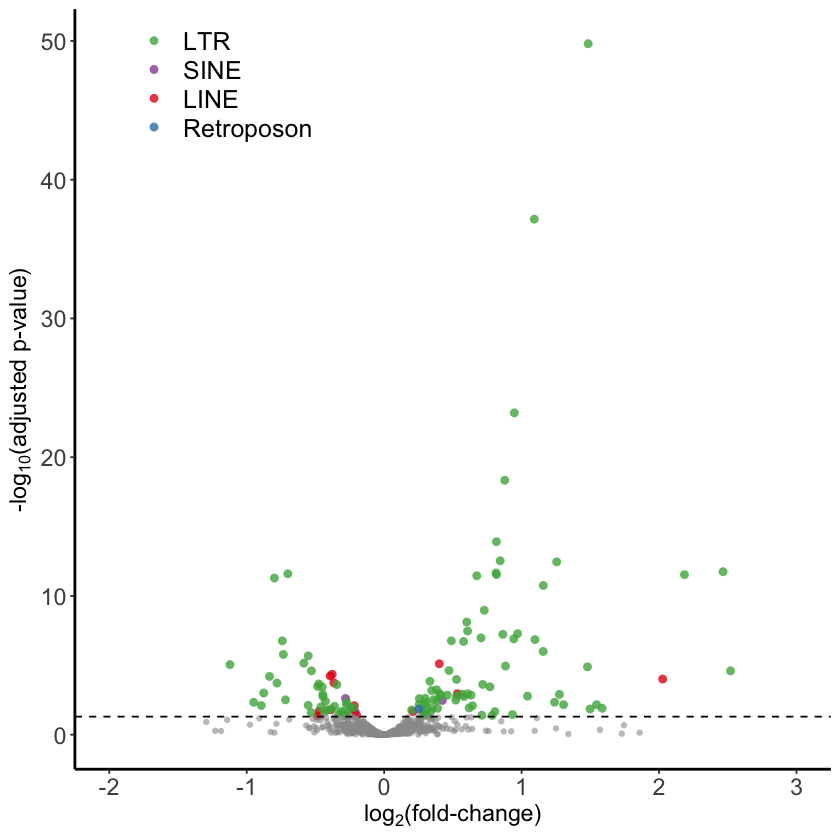

In [18]:
r = "#e41a1c"
b = '#377eb8'
g = "#4daf4a"
p = "#984ea3"

input = read.csv(glue('{data_directory}/results_df_transcripts_ERE.csv'))

input$class = factor(input$class, levels = c('LTR', 'SINE', 'LINE', 'Retroposon'))

volcano_plot = ggplot() +
  geom_point(data = subset(input, significant == TRUE), aes(x = log2FoldChange, y = -log10(padj), fill = class, color = class), size = 2.5, alpha = 0.8, shape = 21, stroke = 0) +
  geom_point(data = subset(input, significant == FALSE), aes(x = log2FoldChange, y = -log10(padj)), size = 1.8, shape = 16, stroke = 0, color = alpha('#9B9A99', 0.6)) +
  geom_hline(yintercept = -log10(0.05), linetype = 'dashed') +
  xlab(expression('log'[2]*'(fold-change)')) +
  ylab(expression('-log'[10]*'(adjusted p-value)')) +
  xlim(-2, 3) +
  scale_fill_manual(values = c(g, p, r, b)) +
  scale_colour_manual(values = c(g, p, r, b)) +
  labs(fill= "") +
  guides(color = F)

volcano_plot + theme_bw() + theme(plot.title = element_text(face = 'bold', size = 20),
                                  plot.subtitle = element_text(size = 14),
                                  axis.text.x = element_text(size = 14),
                                  axis.text.y = element_text(size = 14),
                                  axis.title = element_text(size = 14),
                                  axis.line = element_line(size = 0.8),
                                  panel.border = element_blank(),
                                  legend.text = element_text(size = 15),
                                  legend.title = element_text(size = 18),
                                  legend.position = c(0.2, 0.93),
                                  panel.grid.major = element_blank(),
                                  panel.grid.minor = element_blank())

**Figure 6C**

**Figure 6D**

,pt214_mTEC.hi_new_Aligned.out.bam,pt221_mTEC.hi_new_Aligned.out.bam,pt226_mTEC.hi_new_Aligned.out.bam,pt214_mTEC.lo_new_Aligned.out.bam,pt221_mTEC.lo_new_Aligned.out.bam,pt226_mTEC.lo_new_Aligned.out.bam
,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003.15,4901,1865,1752,5581,2412,2579
ENSG00000000005.6,199,56,82,20,3,6
ENSG00000000419.12,4498,2057,1916,3888,1935,1925
ENSG00000000457.14,2923,1451,1258,3090,1304,1336
ENSG00000000460.17,1833,1197,1107,1916,843,738
ENSG00000000938.13,1839,767,767,655,356,112
